In [1]:
import sys
import pandas as pd
import numpy as np


In [2]:
sys.path.append("../")


In [3]:
import biobss


In [4]:
import neurokit2 as nk
sample_data = pd.read_pickle("..\sample_data\\EDA_Chest.pkl")
sample_data = sample_data.flatten()


In [5]:
decompose = biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_decompose, modality="EDA", sigtype="EDA", method="highpass")
normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.normalize_signal, modality="EDA", sigtype="EDA")
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.resample_signal_object, modality="EDA", sigtype="EDA", target_sample_rate=350)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.signal_features.get_signal_features, parameters={
                                           "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.common.stat_features.get_stat_features, parameters={
                                         "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
corr_features = biobss.pipeline.Feature(name="corr_features", function=biobss.common.correlation_features, parameters={
                                        "modality": "EDA", "sigtype": "EDA","signal_names":['EDA_Raw','EDA_Tonic','EDA_Phasic']}, input_signals={'EDA':['EDA_Raw','EDA_Tonic','EDA_Phasic']})


In [6]:
pipe = biobss.pipeline.Bio_Pipeline(modality="EDA", sigtype="EDA", windowed_process=True,
                                    window_size=60, step_size=30, features_list=[])


In [7]:
pipe.preprocess_queue.add_process(normalize)
pipe.process_queue.add_process(decompose)
pipe.process_queue.add_process(resample)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)
pipe.add_feature_step(corr_features)


In [8]:
pipe.feature_list

In [9]:
pipe.set_input(sample_data, 700, name="EDA_Raw", modality="EDA")


In [10]:
pipe.input


Signal object with 1 channel(s)
EDA_Raw (EDA) (700Hz) ((5920.0,)s) (1 windows) ((4144000,))

In [11]:
pipe


Bio_Pipeline:
	Modality: EDA
	Signal Type: EDA
	Preprocessors: Process list:
	1: normalize_signal

	Processors: Process list:
	1: eda_decompose
	2: resample_signal_object

	Postprocessors: Process list:

	Window Size(Seconds): 60
	Step Size: 30

In [12]:
pipe.run_pipeline()


c:\Users\Cagatay\Desktop\Workspace\Biobss Pipeline\biobss\examples\..\biobss\pipeline\bio_process.py:54: UserWarning: Vectorized method failed. Trying scalar method. It may be significantly slower.
  warnings.warn(


In [13]:
pipe.input


Signal object with 7 channel(s)
EDA_Raw (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Tonic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Phasic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))

In [14]:
pipe.extract_features()


In [15]:
pipe.features


,EDA_RawEDA_Tonic_correl,EDA_RawEDA_Phasic_correl,EDA_TonicEDA_Phasic_correl
0.0,0.906281,0.564965,0.199536
30.0,0.968859,0.316593,0.090156
60.0,0.933856,0.559383,0.234547
90.0,0.990459,0.159469,0.027017
120.0,0.988241,0.166968,0.016125
...,...,...,...
5730.0,0.795176,0.720952,0.168890
5760.0,0.784588,0.746041,0.172848
5790.0,0.790777,0.714396,0.149913
5820.0,0.974681,0.282675,0.093617


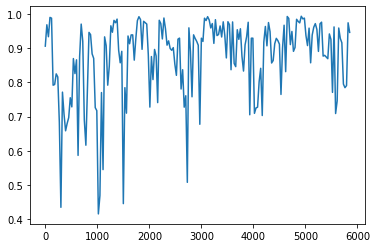

In [16]:
import matplotlib.pyplot as plt
plt.plot(pipe.features['EDA_RawEDA_Tonic_correl'])


In [18]:
pipe.features['EDA_Raw_acr_length']

,EDA_Raw_acr_length,EDA_Raw_acr_length,EDA_Raw_acr_length
0.0,20999.749871,20999.749871,20999.749871
30.0,20999.691437,20999.691437,20999.691437
60.0,20999.747814,20999.747814,20999.747814
90.0,20999.845415,20999.845415,20999.845415
120.0,20999.756391,20999.756391,20999.756391
...,...,...,...
5730.0,20999.227503,20999.227503,20999.227503
5760.0,20999.279074,20999.279074,20999.279074
5790.0,20999.286985,20999.286985,20999.286985
5820.0,20999.240598,20999.240598,20999.240598
